In [1]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

np.random.seed(42)

In [2]:
#Generate Synthetic Data
X = np.linspace(0, 10, 100)
y = 3 * X + 7 + np.random.normal(0, 5, 100)

X = X.reshape(-1, 1)

In [3]:
#K-Fold Implementation From Scratch
def k_fold_split(X, y, k=5, shuffle=True):
    indices = np.arange(len(X))

    if shuffle:
        np.random.shuffle(indices)

    fold_sizes = np.full(k, len(X) // k)
    fold_sizes[:len(X) % k] += 1

    current = 0
    folds = []

    for fold_size in fold_sizes:
        start, stop = current, current + fold_size
        folds.append(indices[start:stop])
        current = stop

    return folds

In [4]:
#Perform Cross Validation
k = 5
folds = k_fold_split(X, y, k=k)

model = LinearRegression()
errors = []

for i in range(k):
    test_idx = folds[i]
    train_idx = np.concatenate([folds[j] for j in range(k) if j != i])

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    errors.append(mse)

print("Fold Errors:", errors)
print("Average CV Error:", np.mean(errors))

Fold Errors: [32.01007915247622, 24.423321507199066, 21.077019430963126, 17.99098353372053, 12.733988951048122]
Average CV Error: 21.64707851508141


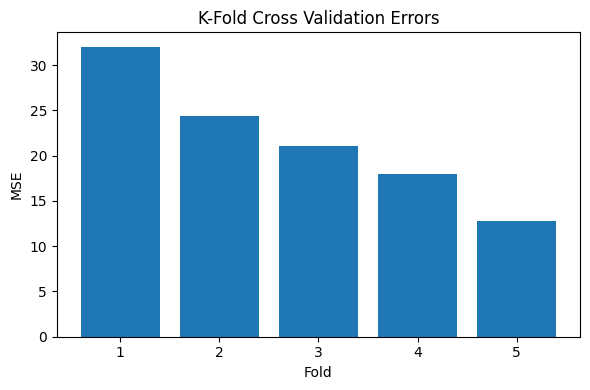

In [5]:
#Visualize Fold Errors
plt.figure(figsize=(6,4))
plt.bar(range(1, k+1), errors)
plt.xlabel("Fold")
plt.ylabel("MSE")
plt.title("K-Fold Cross Validation Errors")
plt.tight_layout()
plt.show()

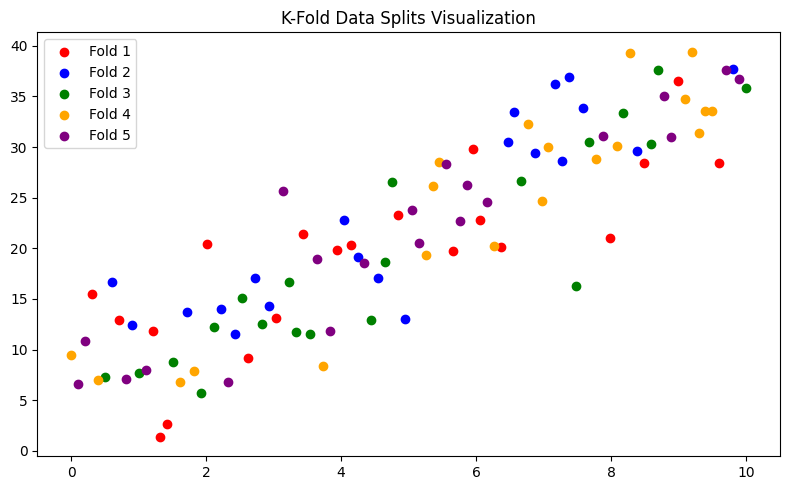

In [6]:
#Visualize Data Splits
plt.figure(figsize=(8,5))

colors = ['red', 'blue', 'green', 'orange', 'purple']

for i, fold in enumerate(folds):
    plt.scatter(X[fold], y[fold], color=colors[i], label=f"Fold {i+1}")

plt.legend()
plt.title("K-Fold Data Splits Visualization")
plt.tight_layout()
plt.show()